In [1]:
# Imports
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import sklearn.cluster as clustering
from sklearn.cluster import DBSCAN
import sklearn.metrics as metrics
from sklearn.neighbors import NearestNeighbors
import numpy as np

personsOffenses = pd.read_csv('Crimes_Against_Persons_Offenses_Offense_Category_by_State_2020.csv', thousands=',')
propertyOffenses = pd.read_csv('Crimes_Against_Property_Offenses_Offense_Category_by_State_2020.csv', thousands=',')
societyOffenses = pd.read_csv('Crimes_Against_Society_Offenses_Offense_Category_by_State_2020.csv', thousands=',')
median_income = pd.read_csv('Median_Household_Income_2020.csv')

abbrv = ['AL','AZ','AR','CO','CT','DE','DC','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
abbrvNoTx = ['AL','AZ','AR','CO','CT','DE','DC','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','UT','VT','VA','WA','WV','WI','WY']

In [2]:
# Merge all 3 datasets into one using the States key
master = pd.merge(personsOffenses, propertyOffenses, on=['State', 'Number of Participating Agencies', 'Population Covered'])
master = pd.merge(master, societyOffenses, on=['State', 'Number of Participating Agencies', 'Population Covered'])

In [3]:
# Rename the 'Total' columns
master.rename(columns={'Total Offenses_x': 'Total Persons Offenses', 'Total Offenses_y': 'Total Property Offenses', 'Total Offenses': 'Total Society Offenses'}, inplace=True)

In [4]:
# Create a copy of master
states = master.copy()
states.drop(0, inplace=True)
states = states[['State','Population Covered']]
states

,State,Population Covered
1,Alabama,715130.0
2,Arizona,1769207.0
3,Arkansas,2818360.0
4,Colorado,5754151.0
5,Connecticut,3488526.0
6,Delaware,986809.0
7,District of Columbia1,NaN
8,Georgia,7938166.0
9,Hawaii,966438.0
10,Idaho,1819575.0


In [5]:
median_income

,State,Income
0,Maryland,94384
1,D.C.,88311
2,New Hampshire,88235
3,Massachusetts,86725
4,New Jersey,85239
5,Utah,83670
6,Colorado,82611
7,Virginia,81947
8,Washington,81083
9,Hawaii,80729


In [24]:
combined = states.merge(median_income, on=['State'], how='inner')
combined['Population Covered'] = combined['Population Covered']
# Drop Texas
combined.drop(37, inplace=True)

In [25]:
corr = combined['Population Covered'].corr(combined['Income'])
mb = np.polyfit(combined['Population Covered'], combined['Income'], 1)
f = np.poly1d(mb)
corr

0.05908685703540055

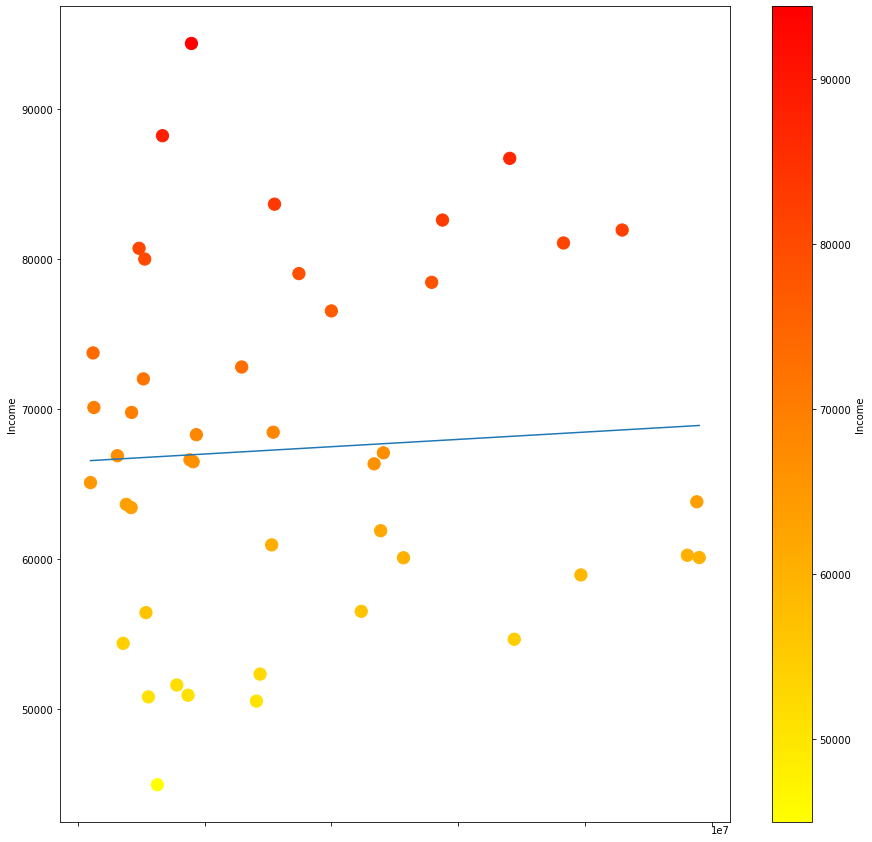

In [26]:
ax = combined.plot.scatter(x='Population Covered', y='Income', c='Income', colormap='autumn_r',s=150, figsize=(15,15))

f_min = f(combined['Population Covered'].min())
f_max = f(combined['Population Covered'].max())
ax.add_line(matplotlib.lines.Line2D([combined['Population Covered'].min(), combined['Population Covered'].max()], [f_min, f_max]))